In [300]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.special import comb

## One in the corner problem

For an $n x n$ grid, say a 10 by 10 grid, each location in the grid has a certain probability of a one showing up. For example, a 5% chance of a 1 showing up, otherwise, a zero will show up. 

The question is, given the height and width of the grid, and the probability that a probability that a 1 will show up in any given location on the grid, what's the expected probability that there will be a one in the corner? (Could be more than 1 one in a corner.)

### Computer simulation

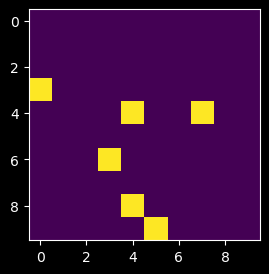

In [360]:
plt.style.use('dark_background')
prob = 0.05
grid = np.random.choice(a=(0,1), replace=True, size=(10,10), p=(1-prob, prob))
plt.figure(figsize=(3,3))
plt.imshow(grid)
plt.show()

In [128]:
n_trials = 10_000
all_corners = list()
r = 10
c = 10

for prob in np.linspace(0.005, 1, 200):
    corners = np.zeros(n_trials)
    for i in range(n_trials):
        grid = np.random.choice(a=(0,1), replace=True, size=(r,c), p=(1-prob, prob))
        corners[i] = 1 in [grid[(0,0)], grid[(r-1,c-1)], grid[(r-1, 0)], grid[(0, c-1)]]
    # end
    all_corners.append(corners.sum() / n_trials)

In [ ]:
print('{:.1%} of trials had a one in a corner'.format(corners.sum() / n_trials))

In [156]:
x = np.linspace(0.005, 1, 200)

In [196]:
dydx_ac = [(all_corners[i+1] - all_corners[i])/0.005 for i in range(len(all_corners)-1)]

In [247]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

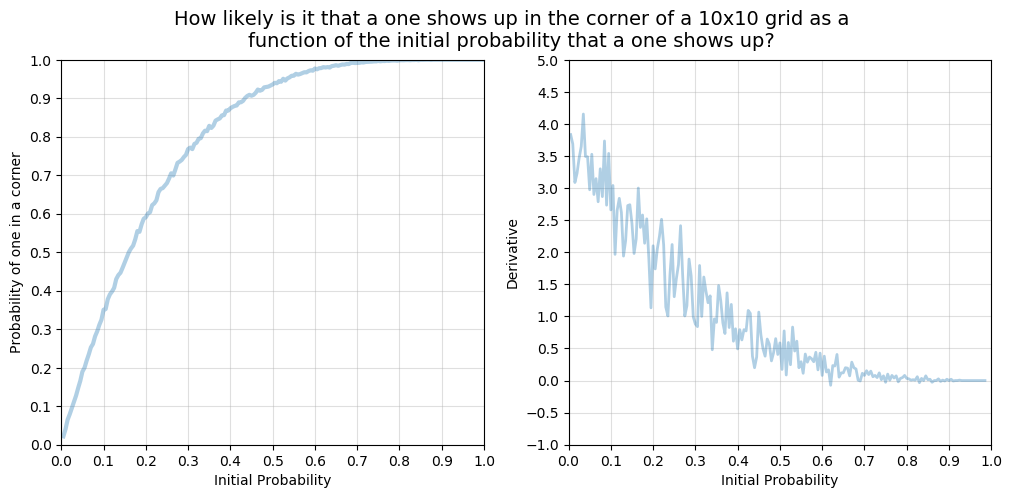

In [399]:
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('How likely is it that a one shows up in the corner of a 10x10 grid as a\n\
function of the initial probability that a one shows up?', 
             fontsize=14)

ax1.plot(x, all_corners, linewidth=3, alpha=0.35)

ax1.set(xlabel='Initial Probability', ylabel='Probability of one in a corner')
ax1.grid(alpha=0.4)
ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.set_xticks(np.linspace(0, 1, 11))
ax1.set_yticks(np.linspace(0, 1, 11))

n_avg = 3
ax2.plot(x[:-n_avg], moving_average(dydx_ac, n_avg), alpha=0.35, linewidth=2)

ax2.set(xlabel='Initial Probability', ylabel='Derivative')
ax2.grid(alpha=0.4)
ax2.set_xticks(np.linspace(0, 1, 11))
ax2.set_xlim((0,1))
ax2.set_ylim((-1,5))
ax2.set_yticks(np.arange(-1, 5.5, 0.5))
# plt.savefig('one_in_corner.png', dpi=300)
plt.show()

### Closed form solution

If we want to know the probability of seeing a 1 in one of the corners, that would just be the initial probability, which in the general case was 5%

In [303]:
0.05

0.05

In [322]:
comb(1, 1)

1.0

If we have two corners, there's three cases for seeing a one in at least one of them:

1. One in the left corner
2. One in the right corner
3. One in both corners

In [304]:
0.05*0.95 + 0.95*0.05 + 0.05*0.05

0.0975

In [321]:
comb(2, 1) + comb(2, 2)

3.0

If we have three corners, there's seven cases for seeing a one in at least one of the corners:

1. One in the first corner, none in the other 2
2. One in the first corner, one in the second corner

3. One in the second corner, none in the other 2
4. One in the second corner, one in the third corner

5. One in the third corner, none in the other 2
6. One in the third coner, one in the first corner

7. One in all three corners

In [320]:
comb(3, 1) + comb(3, 2) + comb(3, 3)

7.0

In general there's:

\begin{equation}
\large \sum_{j=1}^{n}{ {n}\choose {j}}
\end{equation}

Possible combinations in which a one shows up in at least one of the corners, where $n$ is the number of locations being considered (in this case $n = 4$ because there are four corners on the grid). This given by the function below.

In [333]:
n_locations = lambda n: sum([comb(n, j) for j in range(1, n+1)])

In [336]:
n_locations(3)

7.0

In [337]:
n_locations(4)  # for four coners

15.0

For each individual combination, we must multiply the number of ways that combination can occur by the probability of that combination ocurring. 

Each corner that shows up as one has a probability $p$ of showing up as one, in the original example, p was 0.05. Each corner that does not show up as zero has a probability of $1-p$ of showing up as a zero. 

The overall probability of the corners showing up as ones or zeros is given by the counting rule as the product of each of the probabilities. 

For $j$ corners showing up as one, and $n$ corners total, the probability is given by:

\begin{equation}
\large p^j (1-p)^{(n-j)}
\end{equation}

This is the probability of the specific combination ocurring in which $j$ out of the $n$ corners shows up as one. 

We then multiply the probability of the combination ocurring by the number of ways it can occur, as given earlier, and then do the same for all the other favorable combinations.

Doing this, we get the familiar binomial distribution: 


\begin{equation}
\large \sum_{j=1}^{n}{ {{n}\choose{j}}  p^j (1-p)^{(n-j)}}
\end{equation}

Where $n$ is the number of corners, generally 4, and $p$ is the initial probability of a one showing up. Using $n = 4$, we get:


\begin{equation}
\large \sum_{j=1}^{4}{ {{4}\choose{j}}  p^j (1-p)^{(4-j)}}
\end{equation}

We can graph this binomial function for each initial probability and check if it agrees with the result of the computer simulation.

In [365]:
binom_corners = lambda p: sum([comb(4, j) * p**j * (1-p)**(4-j) for j in range(1, 4+1)])

In [366]:
binom_corners(0.05)  # result for probability of 0.05

0.18549375

In [368]:
binom_all = [binom_corners(p) for p in x]

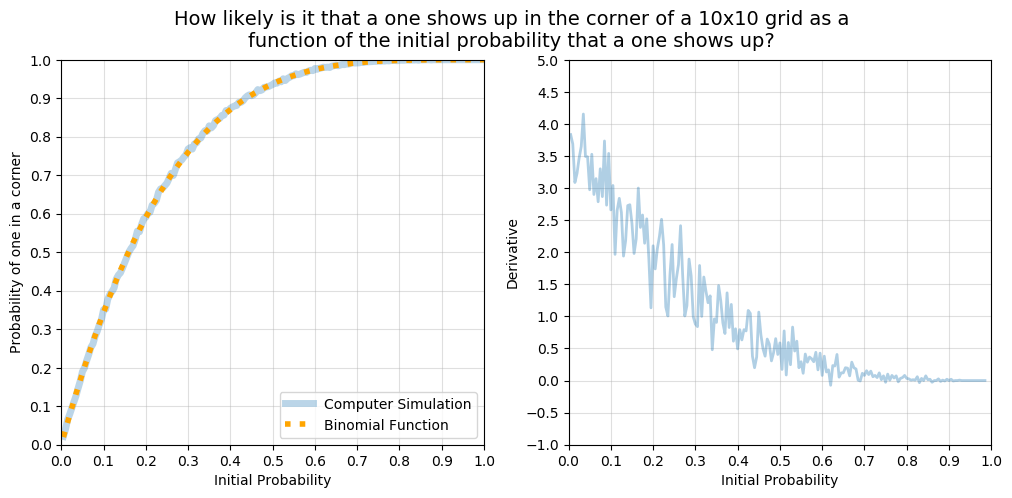

In [398]:
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('How likely is it that a one shows up in the corner of a 10x10 grid as a\n\
function of the initial probability that a one shows up?', 
             fontsize=14)


ax1.set(xlabel='Initial Probability', ylabel='Probability of one in a corner')
ax1.grid(alpha=0.4)
ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.set_xticks(np.linspace(0, 1, 11))
ax1.set_yticks(np.linspace(0, 1, 11))


n_avg = 3
ax2.plot(x[:-n_avg], moving_average(dydx_ac, n_avg), alpha=0.35, linewidth=2)

ax2.set(xlabel='Initial Probability', ylabel='Derivative')
ax2.grid(alpha=0.4)
ax2.set_xticks(np.linspace(0, 1, 11))
ax2.set_xlim((0,1))
ax2.set_ylim((-1,5))
ax2.set_yticks(np.arange(-1, 5.5, 0.5))

ax1.plot(x, all_corners, linewidth=5, alpha=0.3, linestyle='solid',
         label='Computer Simulation')
ax1.plot(x, binom_all, linewidth=4, linestyle='dotted', color='orange',
         alpha=1, label='Binomial Function')
ax1.legend()
plt.savefig('one_in_corner.png', dpi=300)
plt.show()

We can see that the agreement between the simulation and the simulation is perfect, so we're confident in our answer. 

Now for a much more challenging problem, how would we get a closed form solution of the *derivative* shown on the left? 